In [3]:
# from operator import mul
# from matplotlib import cm
import metpy
from metpy import calc
from rbase import *
import matplotlib.pyplot as plt
# import pandas as pd

file_sf = "data/ERA5_surface_6hour_2021JJA.grib"
data_sf = read_grib(file_sf)
data_sf

data_prcp = read_grib(file_sf, filter_by_keys={'shortName': 'tp'})
data_prcp

data_lev = read_grib(
    "/mnt/i/CUG-HydroMeteorology/data/ERA5_pressure_levels_6hour_2021JJA.grib",
    multi_lev=True)
data_lev


date = np.datetime64('2021-08-01T08:00:00')
delta_t = np.timedelta64(6, "h")

ds_lev = data_lev.sel(time=date)

chunk = 10
ind = (slice(None, None, chunk), slice(None, None, chunk))
u = ds_lev.sel(lev=500.0)["u"][ind[0], ind[1]]
v = ds_lev.sel(lev=500.0)["v"][ind[0], ind[1]]
u, v = smooth_uv(u, v)
u, v

tp = ERA5_Prcp_StackOverTime(data_prcp.tp)  # accumulated prcp in 6 hour

prcp = tp.sel(time=(date))
prcp


<xarray.Dataset>
Dimensions:        (time: 352, isobaricInhPa: 11, latitude: 721, longitude: 1440)
Coordinates:
    number         int64 ...
  * time           (time) datetime64[ns] 2021-06-01T08:00:00 ... 2021-08-28T0...
    step           timedelta64[ns] ...
  * isobaricInhPa  (isobaricInhPa) float64 1e+03 900.0 850.0 ... 100.0 50.0 20.0
  * latitude       (latitude) float64 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude      (longitude) float64 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    valid_time     (time) datetime64[ns] ...
Data variables:
    z              (time, isobaricInhPa, latitude, longitude) float32 ...
    r              (time, isobaricInhPa, latitude, longitude) float32 ...
    q              (time, isobaricInhPa, latitude, longitude) float32 ...
    t              (time, isobaricInhPa, latitude, longitude) float32 ...
    u              (time, isobaricInhPa, latitude, longitude) float32 ...
    v              (time, isobaricInhPa, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2021-11-25T19:23 GRIB to CDM+CF via cfgrib-0.9.9...

In [3]:
from pkgs import *

In [4]:
# dates = ds["time"].data
# dates[1]n
import numpy as np
date = np.datetime64('2021-08-01T08:00:00') #+ np.timedelta64(8, "h"), 2, 8, 14, 20
ds = data.sel(time = date)
ds = ds.rename({"latitude": "lat", "longitude": "lon", "isobaricInhPa":"lev"})

In [5]:
ds
# ds.isel(lat = 0, lon = 0)
# ds["lev"]
# ds.sel(ds["lev"].data == 1000)
# ds.sel(isobaricInhPa = 500)

<xarray.Dataset>
Dimensions:     (lev: 11, lat: 721, lon: 1440)
Coordinates:
    number      int64 0
    time        datetime64[ns] 2021-08-01T08:00:00
    step        timedelta64[ns] 00:00:00
  * lev         (lev) float64 1e+03 900.0 850.0 800.0 ... 200.0 100.0 50.0 20.0
  * lat         (lat) float64 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * lon         (lon) float64 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.2 359.5 359.8
    valid_time  datetime64[ns] 2021-08-01
Data variables:
    z           (lev, lat, lon) float32 ...
    r           (lev, lat, lon) float32 ...
    q           (lev, lat, lon) float32 ...
    t           (lev, lat, lon) float32 ...
    u           (lev, lat, lon) float32 ...
    v           (lev, lat, lon) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2021-11-25T19:21 GRIB to CDM+CF via cfgrib-0.9.9...

In [ ]:
# Combine 1D latitude and longitudes into a 2D grid of locations
# lon_2d, lat_2d = np.meshgrid(ds['lon'], ds['lat'])
# wind = xr.ufuncs.sqrt(ds["u"]*ds["u"] + ds["v"]*ds["v"])
# wind
# sqrt(x*x)

In [ ]:
# # ds = ds.assign_coords({"lon": (((ds.lon + 180) % 360) - 180)})
# # ds.coords['lon'] = (ds.coords['lon'] + 180) % 360 - 180
# # ds = ds.sortby(ds.lon)
# ds

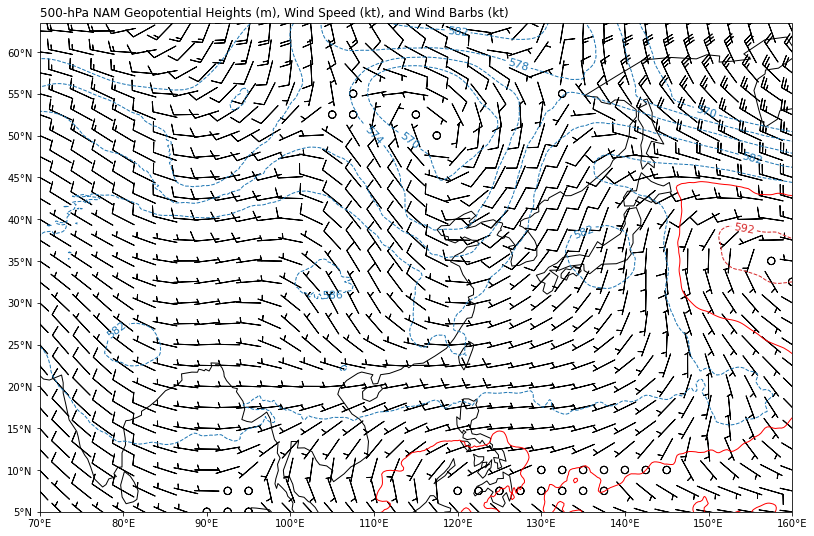

In [9]:
from scipy.ndimage import gaussian_filter
from metpy.units import units

chunk = 10
Islice = (slice(None, None, chunk), slice(None, None, chunk))
u = ds.sel(lev = 500.0)["u"][Islice[0], Islice[1]]
v = ds.sel(lev = 500.0)["v"][Islice[0], Islice[1]]

u, v = smooth_uv(u, v)
u, v

lon = ds["lon"]
lat = ds["lat"]

# Define the figure object and primary axes
fig = plt.figure(1, figsize=(16., 9.))
# datacrs = ccrs.PlateCarree(central_longitude = 180)
datacrs = ccrs.PlateCarree()
ax = plt.axes(projection=datacrs)
# ax = set_axis(ax)
# ax.set_extent([0, 359.9, -60, 90])
ax.set_extent([70, 160, 5, 55])
ax = set_axis_zh(ax)

ax.add_feature(cfeature.STATES.with_scale('50m'), edgecolor='k', alpha=0.2, zorder=0)
ax.coastlines(edgecolor='b')

## 1. geoheight
geoheight = calc.geopotential_to_height(ds.sel(lev = 500.0)["z"])/10

colors = ('tab:blue', 'r', 'tab:red')
delta = 4
clevs = (np.arange(570, 588, delta),
            np.array([588]),
            np.arange(588+delta, 600, delta))
group_contourf(ax, lon, lat, geoheight, clevs, colors, datacrs)
# Plot potential temperature using contour, with some custom labeling
# z_contour = ax.contourf(lon, lat, geoheight,
#                          levels=np.arange(520, 600, 5), 
#                          cmap=plt.cm.coolwarm
#                         #    colors='k', 
#                         #    linewidths=2
#                         )
# ax.clabel(z_contour, fontsize=10, inline=1, inline_spacing=1, colors = "k", fmt='%i', rightside_up=True)

## wind
# chunk = 12
# Islice = (slice(None, None, chunk), slice(None, None, chunk))
# u = ds.sel(lev = 500.0)["u"].metpy.unit_array[Islice[0], Islice[1]]
# v = ds.sel(lev = 500.0)["v"].metpy.unit_array[Islice[0], Islice[1]]

plt.title('500-hPa NAM Geopotential Heights (m), Wind Speed (kt),'
          ' and Wind Barbs (kt)', loc='left')
# plt.title('Valid Time: {}'.format(vtime), loc='right')

ax.barbs(ds["lon"].values[Islice[0]], ds["lat"].values[Islice[1]],
         u.to('kt').m,
         v.to('kt').m,
         pivot='middle', color='black', transform=datacrs)
plt.savefig("a.pdf")

In [8]:
# ds["lon"]
?ax.set_extent

Signature: ax.set_extent(extents, crs=None)
Docstring:
Set the extent (x0, x1, y0, y1) of the map in the given
coordinate system.

If no crs is given, the extents' coordinate system will be assumed
to be the Geodetic version of this axes' projection.

Parameters
----------
extents
    Tuple of floats representing the required extent (x0, x1, y0, y1).
File:      /opt/anaconda3/envs/qgis/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py
Type:      method
